In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Links
https://github.com/matterport/Mask_RCNN/tree/v2.1/samples/balloon


# Reading Dataset

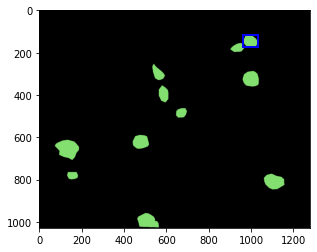

86

In [5]:
dataset_path = "/content/drive/MyDrive/DS/Science_Track/ML/CV/data/all_dataset/"
train_images_path = dataset_path+'train/images/'
train_annotation_path = dataset_path+'train/annotations/'

test_images_path = dataset_path+'test/images/'
test_annotation_path = dataset_path+'test/annotations/'

# разбиение датасета
import os
import json

ann_files = os.listdir(dataset_path+'annotations/')
ann_files.sort()

train_fold = dataset_path + "train"
train_annots = train_fold + "/annotations"
train_images = train_fold + "/images"

test_fold = dataset_path + "test"
test_annots = test_fold + "/annotations"
test_images = test_fold + "/images"

# !mkdir $train_fold
# !mkdir $train_annots
# !mkdir $train_images

# !mkdir $test_fold
# !mkdir $test_annots
# !mkdir $test_images

# import shutil

# for file in ann_files[:-15]:
#   shutil.copy(dataset_path+'annotations/'+file, dataset_path+'train/annotations') 
#   shutil.copy(dataset_path+'images/'+file.replace('png', 'PNG'), dataset_path+'train/images') 

# for file in ann_files[-10:]:
#   shutil.copy(dataset_path+'annotations/'+file, dataset_path+'test/annotations')
#   shutil.copy(dataset_path+'images/'+file.replace('png', 'PNG'), dataset_path+'test/images')

def load_images_from_folder(folder):
    images = []
    files = os.listdir(folder)
    files.sort()
    for filename in files:
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (512, 512))
        if img is not None:
            images.append(img)
    return files, images


img_names, img_list = load_images_from_folder(train_images_path)
msk_names, msk_list = load_images_from_folder(train_annotation_path)


bboxes_json_path = dataset_path + "instances_default.json"

with open(bboxes_json_path, "r") as f:
    instances = json.load(f)
instances.keys()
anns = instances["annotations"]

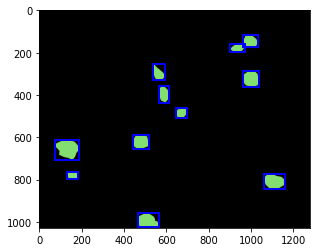

86

In [8]:
anns[0]["bbox"]
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
 
image_id = 1
image = Image.open("/content/drive/MyDrive/DS/Science_Track/ML/CV/data/all_dataset/train/annotations/frame_000000.png")
 
fig, ax = plt.subplots()
 
# Draw boxes and add label to each box
for ann in anns[:11]:
    box = ann['bbox']
    bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2, edgecolor="blue", facecolor="none")
    ax.add_patch(bb)
 
ax.imshow(image)
plt.show()
img_list[0].shape
msk_list[0].shape
len(img_list)

In [ ]:
img_list;

In [ ]:
msk_list;

In [13]:
len(img_list), len(msk_list)

(86, 86)

In [15]:
# class RocksDataset(utils.Dataset):
#     def load_rocks(self, dataset_dir, subset):
#         pass
    
#     def load_mask(self, image_id):
#         pass

#     def image_reference(self, image_id):
#         pass

#Install required packages

In [1]:
%cd
  
!git clone --quiet https://github.com/matterport/Mask_RCNN.git

/root


In [2]:
%cd ~/Mask_RCNN

!pip install -q PyDrive
!pip install -r requirements.txt
!python setup.py install

/root/Mask_RCNN
     |████████████████████████████████| 462 kB 5.3 MB/s 
     |████████████████████████████████| 297 kB 45.3 MB/s 
     |████████████████████████████████| 154 kB 49.7 MB/s 
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info


#Download and extract dataset

In [3]:
%cd ~/Mask_RCNN
!ls -la


/root/Mask_RCNN
total 84
drwxr-xr-x 10 root root  4096 Apr 11 20:01 .
drwx------  1 root root  4096 Apr 11 20:01 ..
drwxr-xr-x  2 root root  4096 Apr 11 20:01 assets
drwxr-xr-x  4 root root  4096 Apr 11 20:01 build
drwxr-xr-x  2 root root  4096 Apr 11 20:01 dist
drwxr-xr-x  8 root root  4096 Apr 11 20:01 .git
-rw-r--r--  1 root root   569 Apr 11 20:01 .gitignore
drwxr-xr-x  2 root root  4096 Apr 11 20:01 images
-rw-r--r--  1 root root  1095 Apr 11 20:01 LICENSE
-rw-r--r--  1 root root    58 Apr 11 20:01 MANIFEST.in
drwxr-xr-x  2 root root  4096 Apr 11 20:01 mask_rcnn.egg-info
drwxr-xr-x  2 root root  4096 Apr 11 20:01 mrcnn
-rw-r--r--  1 root root 13771 Apr 11 20:01 README.md
-rw-r--r--  1 root root   119 Apr 11 20:01 requirements.txt
drwxr-xr-x  6 root root  4096 Apr 11 20:01 samples
-rw-r--r--  1 root root    99 Apr 11 20:01 setup.cfg
-rw-r--r--  1 root root  2518 Apr 11 20:01 setup.py


In [4]:
!mkdir dataset

In [12]:
rcnn_dataset_path = "/content/drive/MyDrive/DS/Science_Track/ML/CV/data/r_cnn_dataset/"

In [14]:
!cp -r $rcnn_dataset_path ./dataset/

# Edit settings file

In [15]:
%cd ~/Mask_RCNN

!cp ~/Mask_RCNN/samples/balloon/balloon.py ./rocks.py

!sed -i -- 's/balloon/rocks/g' rocks.py
!sed -i -- 's/Balloon/Rocks/g' rocks.py
!sed -i -- 's/epochs=30/epochs=5/g' rocks.py

/root/Mask_RCNN


#Train Model

In [22]:
!pip install tensorflow==1.15
!pip install keras==2.1.0

     |████████████████████████████████| 302 kB 5.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.0
    Uninstalling Keras-2.3.0:
      Successfully uninstalled Keras-2.3.0


In [19]:
!pip install 'h5py<3.0.0'

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [23]:
%cd ~/Mask_RCNN

!python rocks.py train --dataset=dataset/ --weights=coco

Streaming output truncated to the last 5000 lines.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)
rocks.py:168: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised ins

#Run inference on test dataset

In [26]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import rocks

# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

custom_WEIGHTS_PATH = sorted(glob.glob("/logs/*/mask_rcnn_*.h5"))[-1]

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

config = rocks.RocksConfig()
custom_DIR = os.path.join(ROOT_DIR, "dataset")

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax
  
# Load validation dataset
dataset = rocks.RocksDataset()
dataset.load_rocks(custom_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# load the last model you trained
# weights_path = model.find_last()[1]

# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

<module 'mrcnn.visualize' from '/root/Mask_RCNN/mrcnn/visualize.py'>

image ID: rocks.frame_000090.PNG (0) /root/Mask_RCNN/dataset/val/frame_000090.PNG
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (11,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (11, 4)               min:   32.00000  max:  901.00000  int32
gt_mask                  shape: (1024, 1024, 11)      min:    0.00000  max:    1.00000  bool
image ID: rocks.frame_000091.PNG (1) /root/Mask_RCNN/dataset/val/frame_000091.PNG
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024,

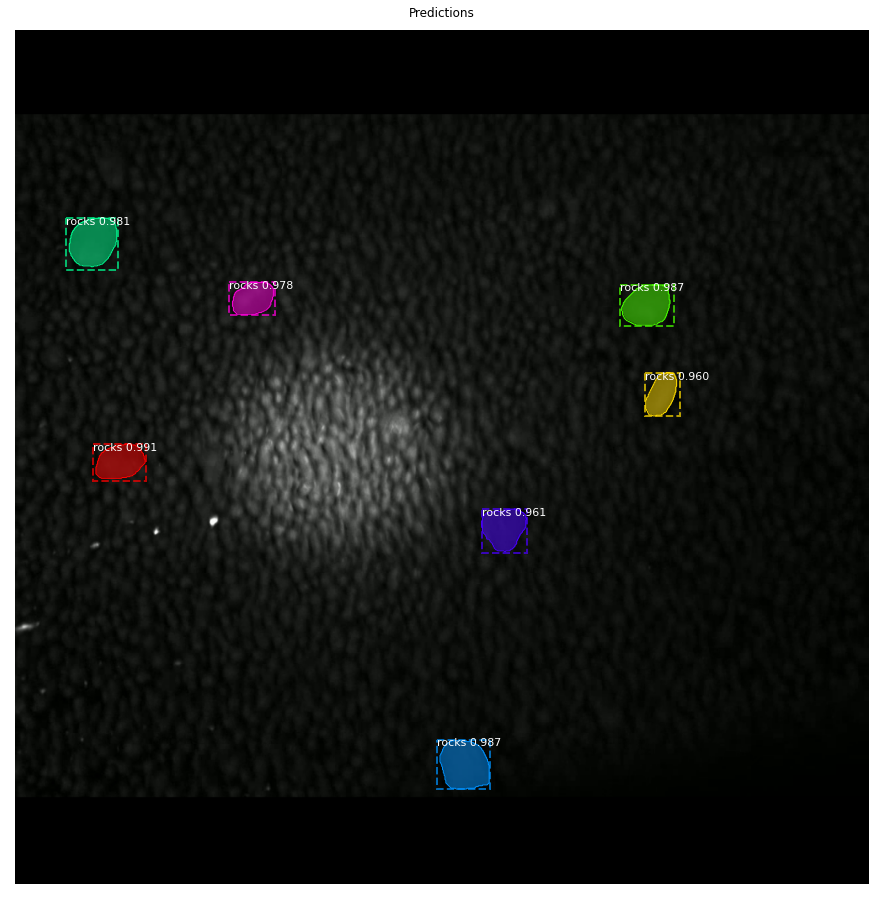

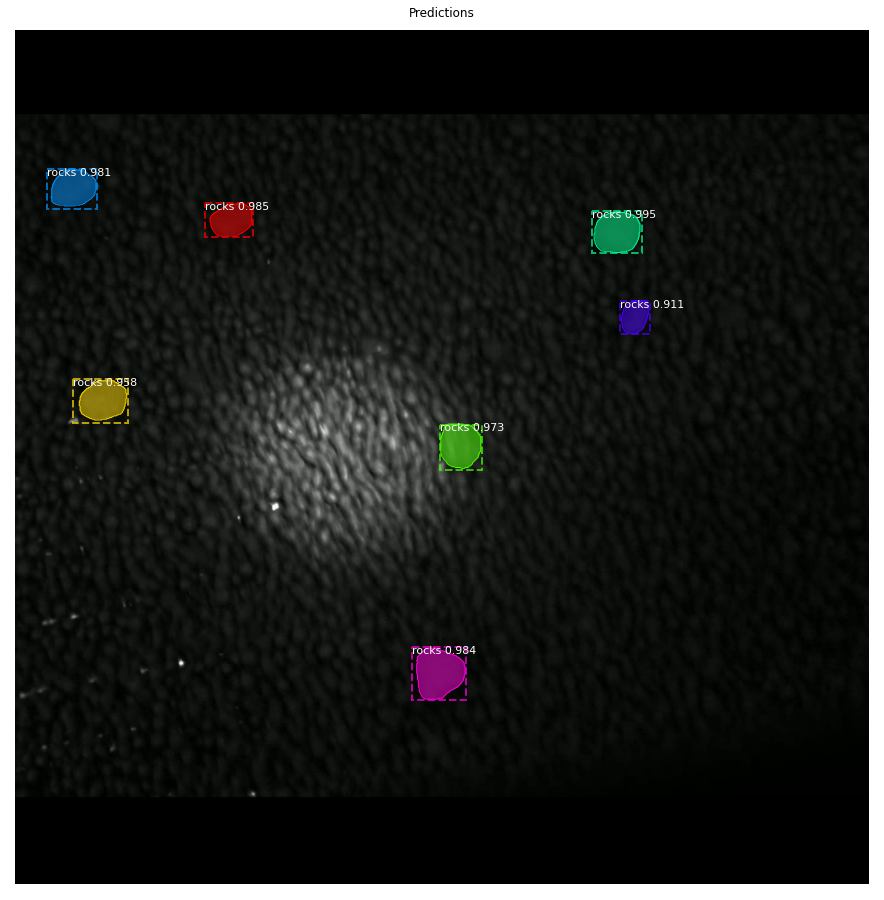

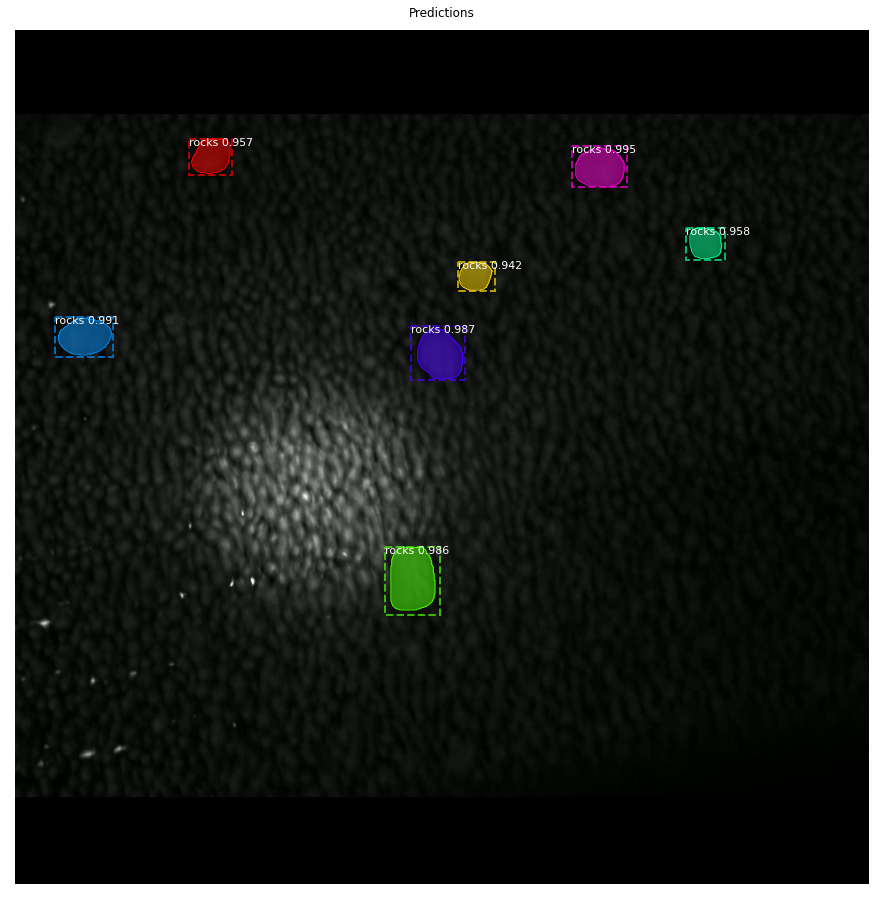

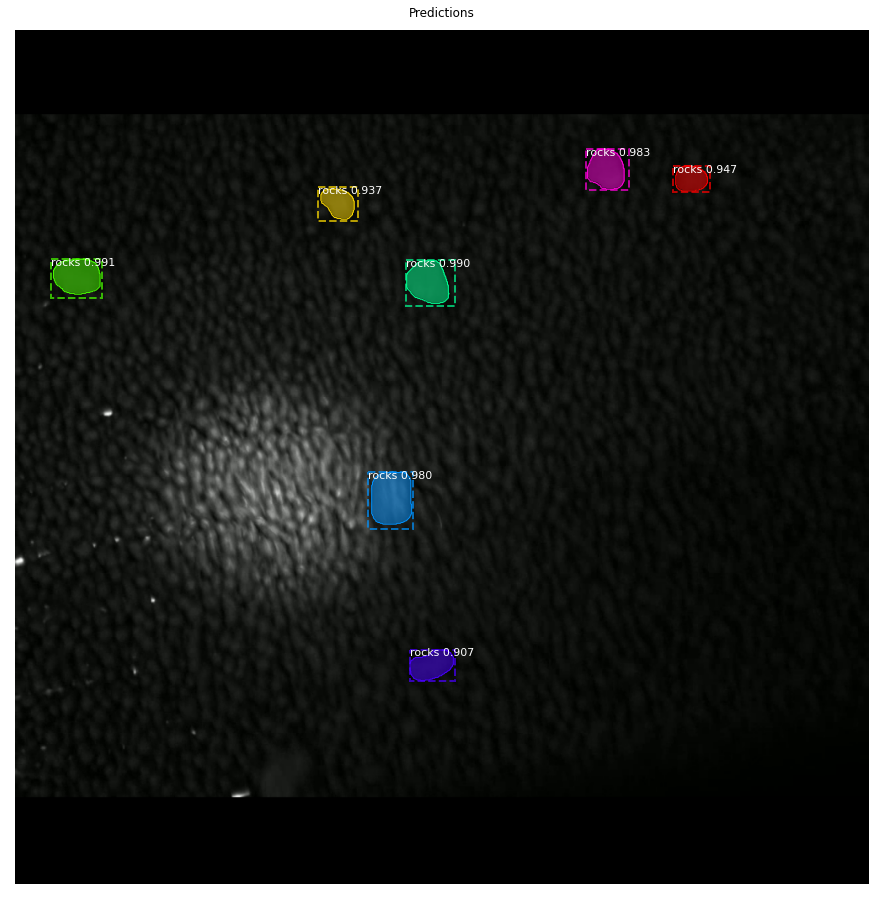

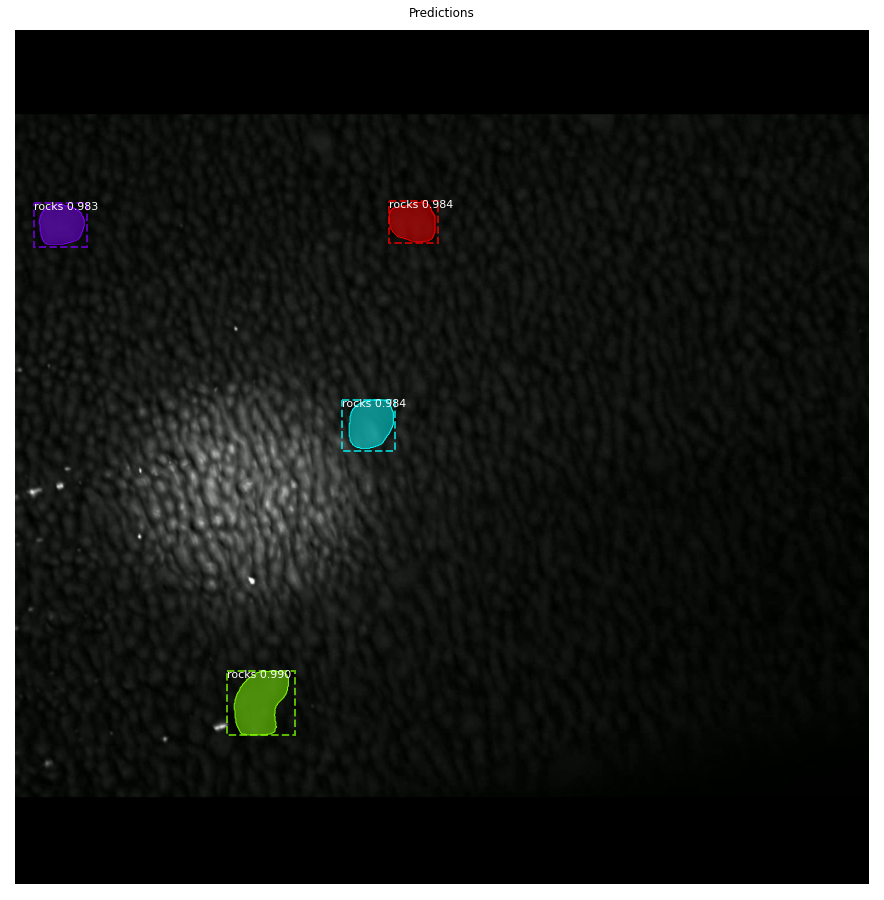

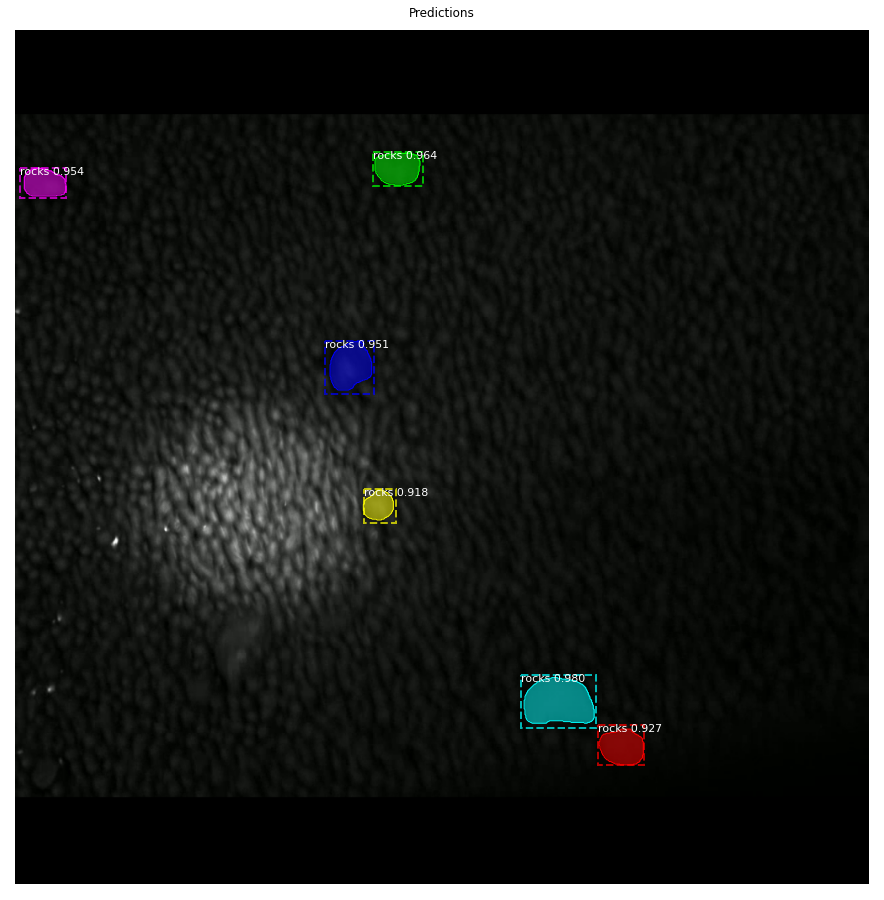

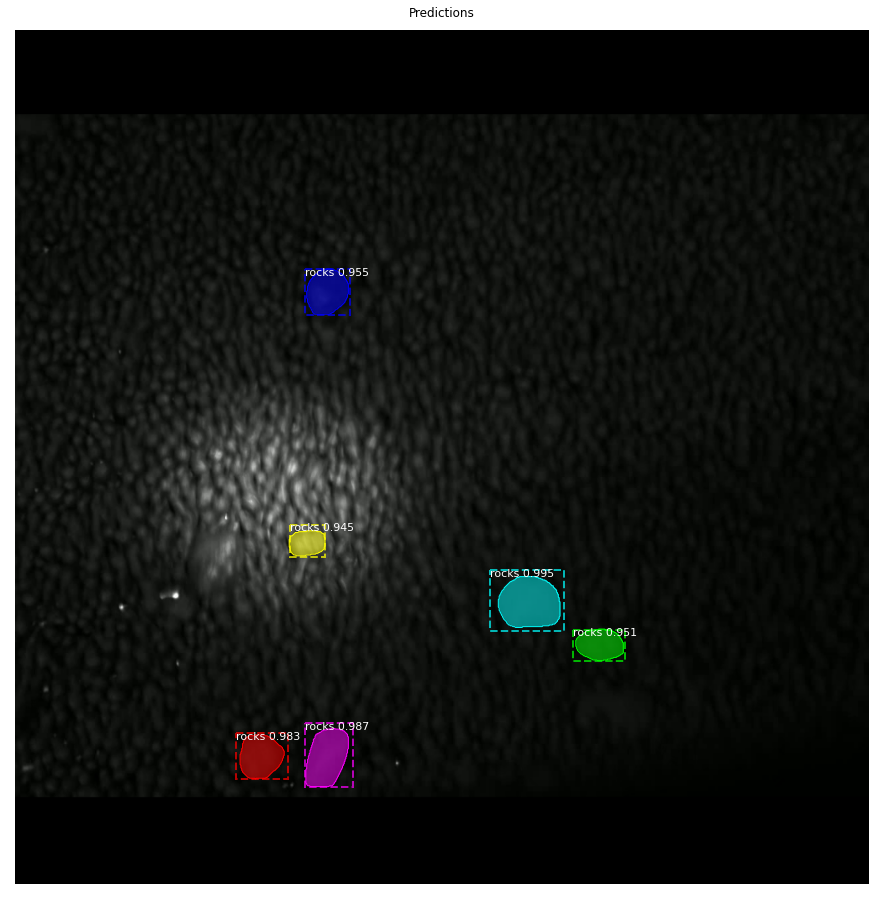

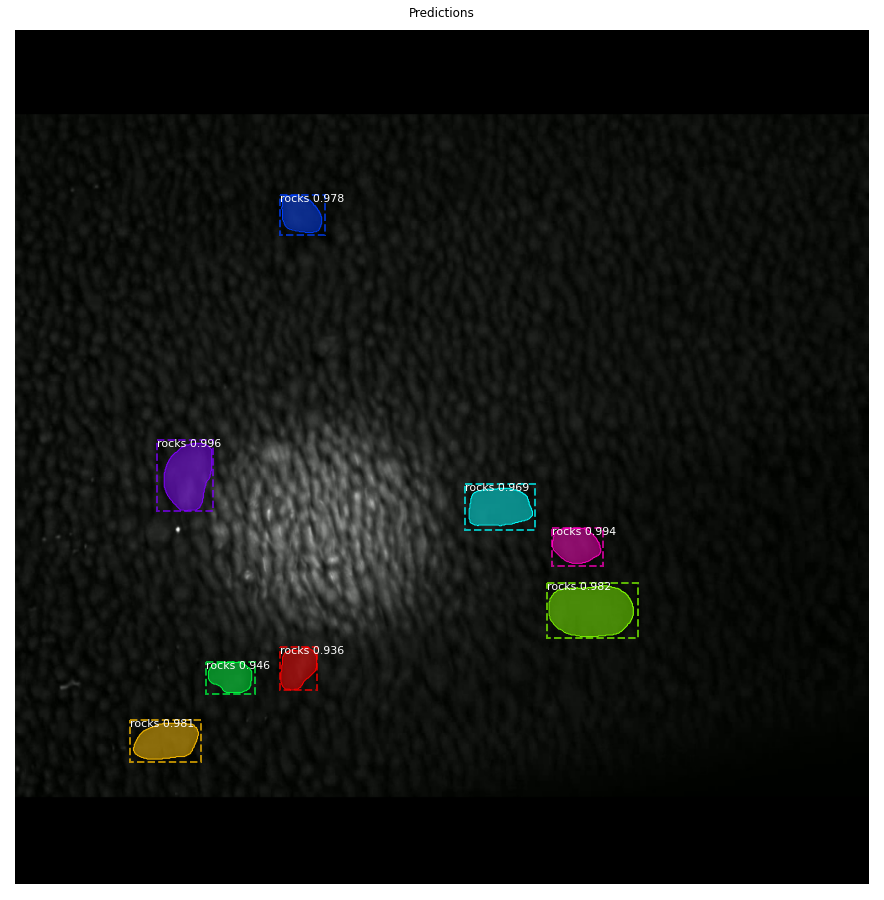

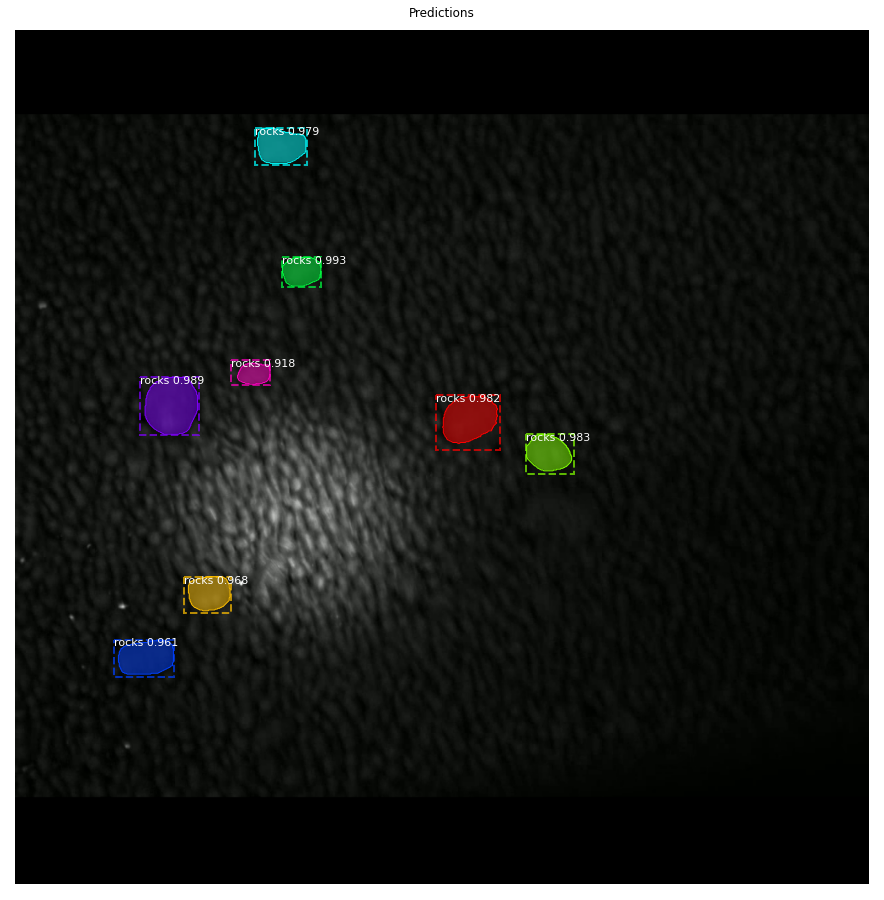

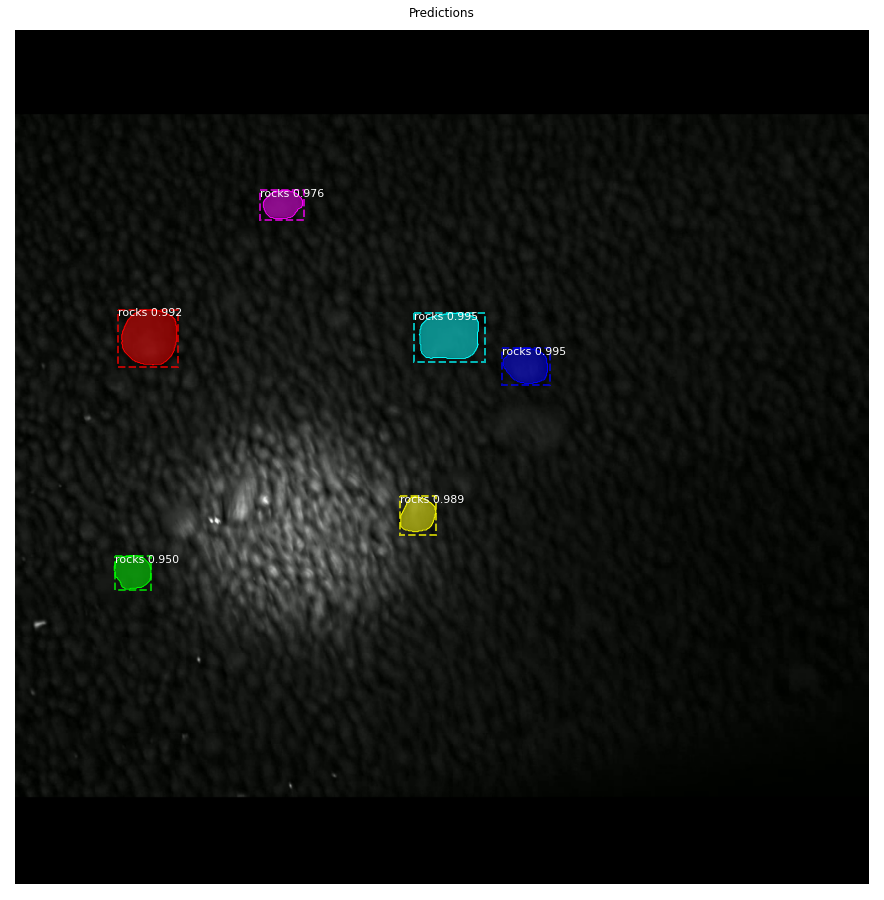

In [27]:
#image_id = random.choice(dataset.image_ids)
for image_id in dataset.image_ids:
  image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
  info = dataset.image_info[image_id]
  print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                         dataset.image_reference(image_id)))

  # Run object detection
  results = model.detect([image], verbose=1)

  # Display results
  ax = get_ax(1)
  r = results[0]
  visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                              dataset.class_names, r['scores'], ax=ax,
                              title="Predictions")
  log("gt_class_id", gt_class_id)
  log("gt_bbox", gt_bbox)
  log("gt_mask", gt_mask)

In [31]:
# save the model
!cp -r /logs/rocks20220411T2049 $rcnn_dataset_path

In [32]:
!python3 --version

Python 3.7.13
